In [1]:
!git clone https://github.com/open-mmlab/mmpretrain.git

fatal: destination path 'mmpretrain' already exists and is not an empty directory.


In [2]:
!pip install openmim

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [5]:
import os
os.chdir('mmpretrain')

In [6]:
!mim install -e ".[multimodal]"

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html
Obtaining file:///workspace/openmmhomework2/mmpretrain
     |████████████████████████████████| 42 kB 297 kB/s eta 0:00:011
     |████████████████████████████████| 7.1 MB 877 kB/s eta 0:00:01
     |████████████████████████████████| 771 kB 893 kB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 400 kB/s eta 0:00:01
     |████████████████████████████████| 224 kB 903 kB/s eta 0:00:01
     |████████████████████████████████| 160 kB 1.3 MB/s eta 0:00:01
Using cached `mminstall.txt` for mmcls==0.21.0: /root/.cache/mim/mminstall/mmcls==0.21.0.txt
Get 'mim' extra requirements from `mminstall.txt` for mmcls 0.21.0: [].
  Running setup.py develop for mmpretrain


In [2]:
import mmpretrain
from mmpretrain import get_model, list_models, inference_model

In [5]:
print(list_models(task="Image Classification", pattern="resnet18"))
print(list_models(task="Image Caption", pattern="blip"))

['resnet18_8xb16_cifar10', 'resnet18_8xb32_in1k']
['blip-base_3rdparty_caption', 'blip2-opt2.7b_3rdparty-zeroshot_caption']


In [6]:
model = get_model("resnet18_8xb16_cifar10")
type(model)

mmpretrain.models.classifiers.image.ImageClassifier

In [7]:
model = get_model("resnet18_8xb32_in1k")
type(model.backbone)

mmpretrain.models.backbones.resnet.ResNet

In [15]:
inference_model(model, '/workspace/openmmhomework2/data/fruit30_train/菠萝/1.jpg', show=True)

{'pred_scores': array([0.00107208, 0.00098172, 0.00094885, 0.00099114, 0.00102382,
        0.0009888 , 0.00101516, 0.00092602, 0.00099722, 0.00099839,
        0.00099615, 0.00097676, 0.00096396, 0.00094272, 0.00100609,
        0.00099752, 0.00098686, 0.00094861, 0.0010123 , 0.00099464,
        0.00091175, 0.00102559, 0.0010039 , 0.00099925, 0.00108934,
        0.00100863, 0.00098169, 0.00099697, 0.0009754 , 0.00098136,
        0.00103804, 0.00099601, 0.00101594, 0.00100718, 0.00099423,
        0.00103161, 0.00099038, 0.00098731, 0.0010167 , 0.00106019,
        0.001046  , 0.00094903, 0.00096363, 0.00103376, 0.00099756,
        0.00104066, 0.00100703, 0.00095924, 0.00101714, 0.0009997 ,
        0.00101979, 0.00104993, 0.00096016, 0.00093891, 0.00100851,
        0.00093614, 0.00102719, 0.000973  , 0.00099507, 0.00105429,
        0.00106727, 0.00099467, 0.0010076 , 0.00093091, 0.00093447,
        0.00097874, 0.00095124, 0.00108264, 0.00096031, 0.00104979,
        0.00095543, 0.00100806, 0

In [14]:
inference_model('blip-base_3rdparty_caption', '/workspace/openmmhomework2/data/fruit30_train/菠萝/1.jpg', show=True)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'BlipTokenizer'.


Loads checkpoint by http backend from path: 
https://download.openmmlab.com/mmclassification/v1/blip/blip-base_3rdparty_coco-caption_20230419-a5b71af3.pth

{'pred_caption': 'a pineapple sitting on top of a wooden table'}

In [17]:
from mmengine import Config

In [20]:
cfg = Config.fromfile('/workspace/openmmhomework2/mmpretrain/configs/resnet/resnet50_8xb32_in1k.py')
cfg.model.head.num_classes 

1000

In [21]:
import os

# 获取数据集文件夹路径
CustomDatasetPath = '/workspace/openmmhomework2/data/fruit30_train'
# 获取数据集文件夹下的所有文件
CustomDatasetFile = os.listdir(CustomDatasetPath)
# 如果文件夹中不存在train、val、test文件夹，则创建
dataset_type = ['train', 'val', 'test']
for type in dataset_type:
    if type not in CustomDatasetFile:
        os.mkdir(os.path.join(CustomDatasetPath, type))
    else:
        # 清空文件夹
        os.removedirs(os.path.join(CustomDatasetPath, type))

# 遍历所有文件
for fruit_name in CustomDatasetFile:
    for type in dataset_type:
        os.mkdir(os.path.join(CustomDatasetPath, type, fruit_name))
    # 水果文件夹路径
    fruit_path = os.path.join(CustomDatasetPath, fruit_name)
    # 获取水果文件夹下的所有文件
    fruit_file = os.listdir(fruit_path)
    # 将水果文件夹下的所有文件分为训练集、验证集、测试集
    train_file = fruit_file[:int(len(fruit_file)*0.8)]
    val_file = fruit_file[int(len(fruit_file)*0.8):int(len(fruit_file)*0.9)]
    test_file = fruit_file[int(len(fruit_file)*0.9):]
    # 将训练集、验证集、测试集分别放入对应文件夹
    for file in train_file:
        os.rename(os.path.join(fruit_path, file), os.path.join(CustomDatasetPath, 'train', fruit_name, file))
    for file in val_file:
        os.rename(os.path.join(fruit_path, file), os.path.join(CustomDatasetPath, 'val', fruit_name, file))
    for file in test_file:
        os.rename(os.path.join(fruit_path, file), os.path.join(CustomDatasetPath, 'test', fruit_name, file))
    # 删除空文件夹
    os.removedirs(fruit_path)
    
# from https://github.com/Hust-Liaoyuyang/OpenMMLabHomeWork/tree/master/homework/%E7%AC%AC%E4%BA%8C%E6%AC%A1

In [ ]:
os.chdir('/workspace/openmmhomework2/mmpretrain/projects/openmm_fruit')
!mim train mmpretrain resnet50_finetune.py --work-dir='/workspace/openmmhomework2/res1'

In [ ]:
!mim test mmpretrain resnet50_finetune.py --checkpoint '/workspace/openmmhomework2/res/epoch_20.pth'

Result in test data.
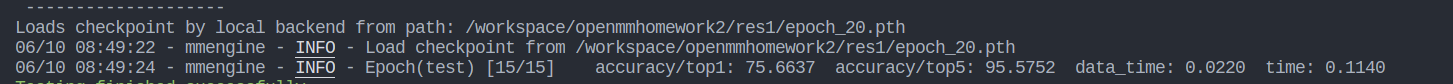

Inference

In [ ]:
!mim test mmpretrain resnet50_finetune.py --checkpoint '/workspace/openmmhomework2/res/epoch_20.pth' --out '/workspace/openmmhomework2/res1/result.pkl'

In [ ]:
!mim run mmpretrain analyze_results resnet50_finetune.py '/workspace/openmmhomework2/res1/result.pkl' --out-dir 'workspace/openmmhomework2/res1/analyze/'

In [28]:
from mmpretrain import ImageClassificationInferencer
inferencer = ImageClassificationInferencer('./resnet50_finetune.py', pretrained='/workspace/openmmhomework2/res1/epoch_20.pth')

06/10 09:00:06 - mmengine - INFO - Because batch augmentations are enabled, the data preprocessor automatically enables the `to_onehot` option to generate one-hot format labels.


Loads checkpoint by local backend from path: /workspace/openmmhomework2/res1/epoch_20.pth

In [29]:
inferencer('/workspace/openmmhomework2/test1.jpeg', show=True)

/opt/conda/lib/python3.8/site-packages/mmengine/visualization/utils.py:240: UserWarning: Glyph 36710 (\N{CJK 
UNIFIED IDEOGRAPH-8F66}) missing from current font.
  s, (width, height) = canvas.print_to_buffer()

/opt/conda/lib/python3.8/site-packages/mmengine/visualization/utils.py:240: UserWarning: Glyph 21400 (\N{CJK 
UNIFIED IDEOGRAPH-5398}) missing from current font.
  s, (width, height) = canvas.print_to_buffer()

/opt/conda/lib/python3.8/site-packages/mmengine/visualization/utils.py:240: UserWarning: Glyph 23376 (\N{CJK 
UNIFIED IDEOGRAPH-5B50}) missing from current font.
  s, (width, height) = canvas.print_to_buffer()

[{'pred_scores': array([0.00632268, 0.00276279, 0.02989382, 0.02788787, 0.00989649,
         0.00374374, 0.01893781, 0.00707516, 0.00714554, 0.00799397,
         0.00262517, 0.00545458, 0.03905766, 0.00428065, 0.00560135,
         0.00426702, 0.00520792, 0.00649118, 0.0217599 , 0.00500866,
         0.01086793, 0.00500948, 0.00335261, 0.00744871, 0.01388742,
         0.01014274, 0.00835847, 0.7082688 , 0.00526493, 0.0059848 ],
        dtype=float32),
  'pred_label': 27,
  'pred_score': 0.7082688212394714,
  'pred_class': '车厘子'}]

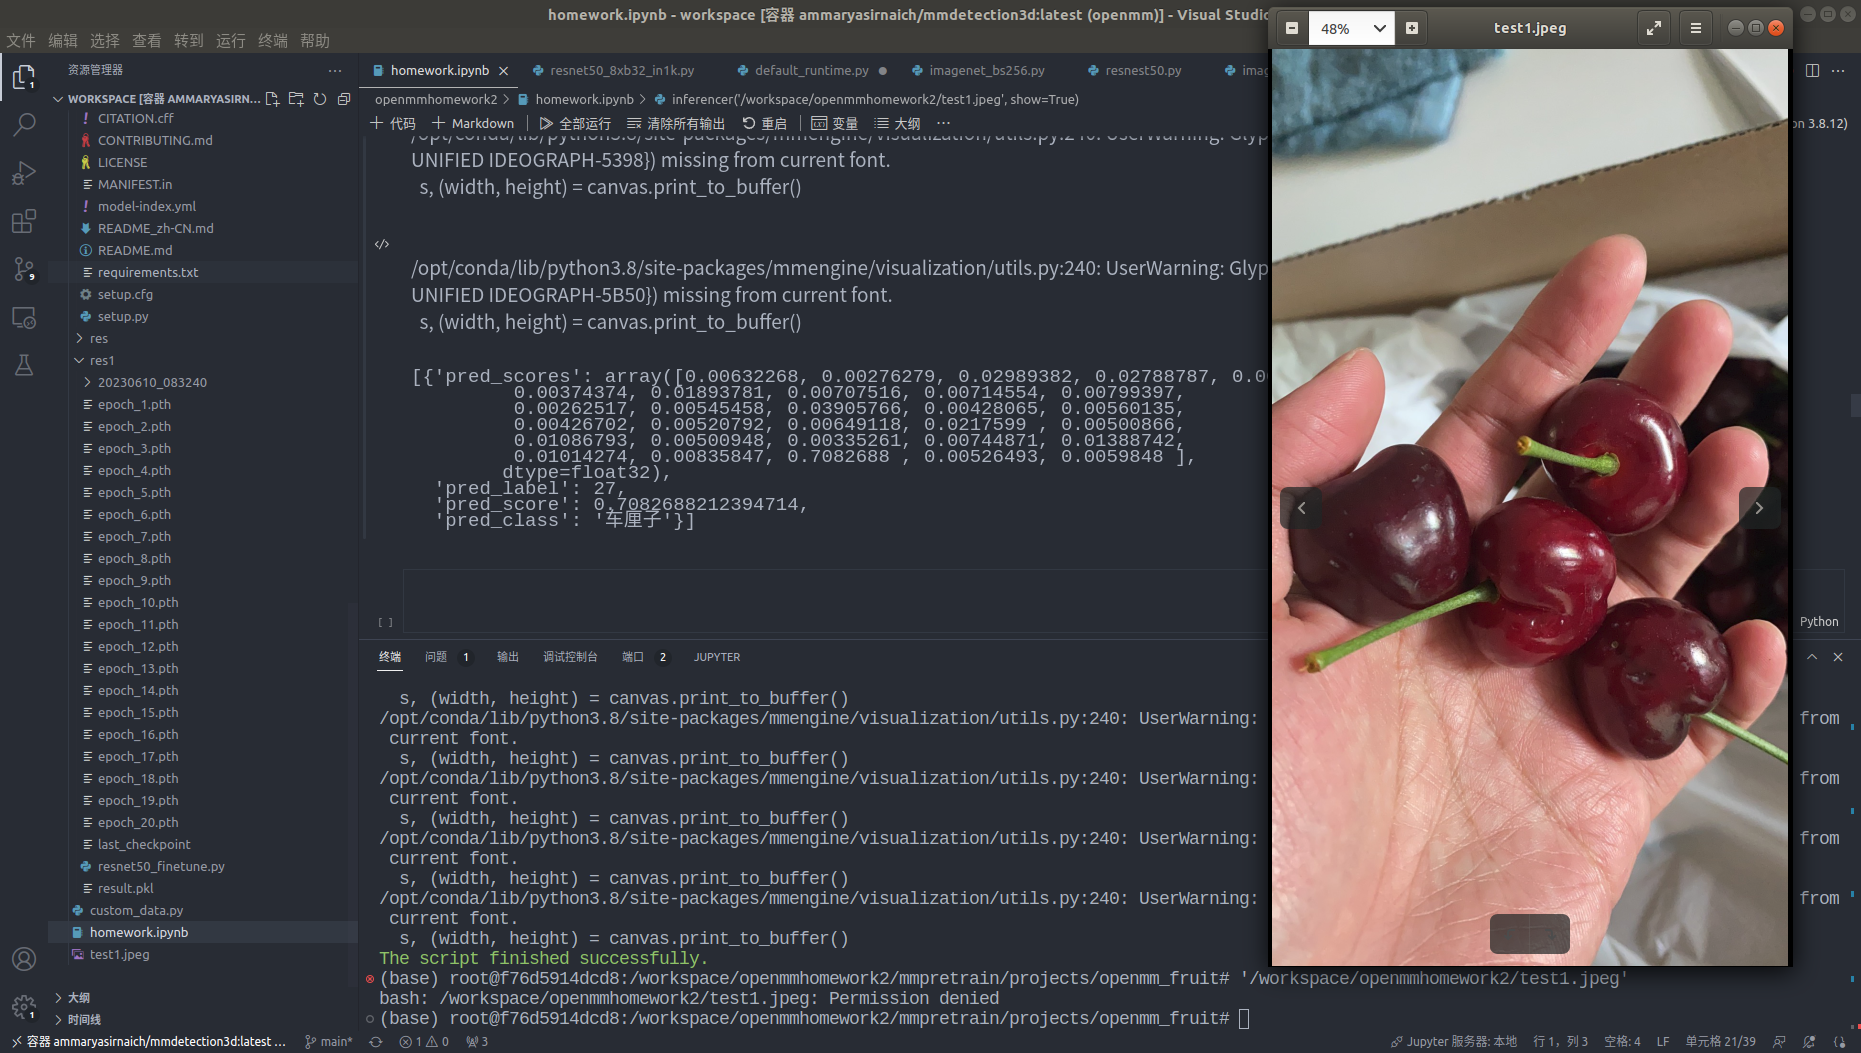